# feat_treat() class

### Example of feat_treat()

In [19]:
import pandas as pd
# import data which was subset using R
y= pd.read_csv('/home/cristianromero/Documents/Datasets/kantar_6_targets.csv')
X= pd.read_csv('/home/cristianromero/Documents/Datasets/kantar_6_features.csv')

# remove extra id columns (relic of exporting data from R)
y=y.iloc[:,1]
X=X.iloc[:,1:len(X)]

In [32]:
treatment1 = feat_treat(X,y,42)

non-numeric column indices:
object type:  [1, 2, 4, 5, 27, 70, 86, 162, 164, 165, 166, 167, 172, 173]
boolean type:  []
date type:  []  

 Class  Count
     0   6640
     1   2290 
 
Base rate:  0.2564389697648376


In [33]:
# impute missing values
treatment1.check_na(50)

                 column_name  percent_na
1  ind_number_of_trade_lines   78.230683
0             hh_boat_length   95.319149 
 
Index stored in: self.na_col


In [34]:
# return identified columns
treatment1.na_col

['hh_boat_length', 'ind_number_of_trade_lines']

In [35]:
# remove 
print(treatment1.X.shape)
treatment1.handle_na('remove',treatment1.na_col)
print(treatment1.X.shape)

(8930, 174)
(8930, 172)


In [36]:
treatment1.check_na() # run with no argument to return all columns with missing values
treatment1.handle_na('median',treatment1.na_col)

                                    column_name  percent_na
9           hh_pcnt_pop_professional_occupation    0.011198
4           hh_median_rent_as_pcnt_of_hh_income    0.022396
10                              hh_pcnt_poverty    0.022396
11                        hh_pcnt_self_employed    0.022396
2                 hh_average_worker_travel_time    0.111982
13                           hh_pcnt_unemployed    0.212766
7                     hh_pcnt_housing_300k_plus    0.268757
14                 hh_pcnt_workers_work_at_home    0.492721
5                                    hh_ownrent    0.683091
8              hh_pcnt_income_public_assistance    1.041433
6                   hh_pcnt_hh_income_150k_plus    1.276596
12  hh_pcnt_total_work_16_plus_use_public_trans    2.799552
16                           hh_vehicles_per_hh    2.922732
0                                           age    3.840985
1                          hh_actual_hom_evalue   11.534155
3                       hh_home_equity_e

In [37]:
treatment1.check_na()

Empty DataFrame
Columns: [column_name, percent_na]
Index: [] 
 
Index stored in: self.na_col


In [38]:
treatment1.encode()

In [39]:
t2, t3, t4 = treatment1.copy(3)

In [78]:
t3.X

,age,age_group,county_name,delivery_unit_size_raw,dma,gender,hh_active_consumer,hh_actual_hom_evalue,hh_age_0_3,hh_age_13_17,...,ind_political_party,ind_vendor_assimilation_code,ind_vendor_ethnic_group,ind_vendor_religion,ind_work_at_home_flag,length_of_residence,name_address_source,occupancy_count,state,zip_code
0,69.0,0,5,1,10,0,4,80.0,0,0,...,1,4,0,0,0,24,1,1,14,9
1,67.0,0,13,1,10,0,9,50.0,0,0,...,0,4,0,0,0,24,1,1,14,9
2,73.0,0,10,1,9,0,1,141.0,0,0,...,2,4,0,0,0,23,1,1,14,9
3,38.0,1,10,1,10,0,0,92.0,0,0,...,1,4,0,0,0,16,1,1,10,9
4,67.0,0,10,1,10,0,6,163.0,0,0,...,1,4,0,0,0,18,1,1,10,9
5,70.0,0,10,1,10,1,4,87.0,0,0,...,1,4,0,0,0,45,1,1,14,9
6,71.0,0,9,1,9,1,5,96.0,0,0,...,1,4,7,5,0,45,1,1,14,9
7,26.0,2,10,1,9,0,0,60.0,0,0,...,0,4,6,0,0,12,1,1,14,9
8,53.0,1,10,4,10,0,1,185.0,0,0,...,1,4,0,0,0,26,1,4,10,9
9,49.0,1,10,1,10,0,3,99.0,0,1,...,1,4,11,6,0,12,1,1,14,9


In [41]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier

In [42]:
treatment1.tune_test(tuning_iter=1,sample=False,model=classifier)

Estimator:  <class 'sklearn.ensemble.forest.RandomForestClassifier'>  
 
Sampling technique:  None 
 
Tuning...
Best roc_auc: 0.6208406679225856 using {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 89, 'max_features': 0.6338937490947576, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 0.24219666927863667, 'min_samples_split': 0.21318068732397508, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 700, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False} 

Validating model...


TypeError: performance_metrics() got multiple values for argument 'y_test'

In [ ]:
treatment1.metrics

In [ ]:
treatment1.hyperparameters

non-numeric column indices:
object type:  [1, 2, 4, 5, 27, 70, 86, 162, 164, 165, 166, 167, 172, 173]
boolean type:  []
date type:  []  

 Class  Count
     0   6640
     1   2290 
 
Base rate:  0.2564389697648376
                 column_name  percent_na
1  ind_number_of_trade_lines   78.230683
0             hh_boat_length   95.319149 
 
Index stored in: self.na_col
                                    column_name  percent_na
9           hh_pcnt_pop_professional_occupation    0.011198
4           hh_median_rent_as_pcnt_of_hh_income    0.022396
10                              hh_pcnt_poverty    0.022396
11                        hh_pcnt_self_employed    0.022396
2                 hh_average_worker_travel_time    0.111982
13                           hh_pcnt_unemployed    0.212766
7                     hh_pcnt_housing_300k_plus    0.268757
14                 hh_pcnt_workers_work_at_home    0.492721
5                                    hh_ownrent    0.683091
8              hh_pcnt_income_p

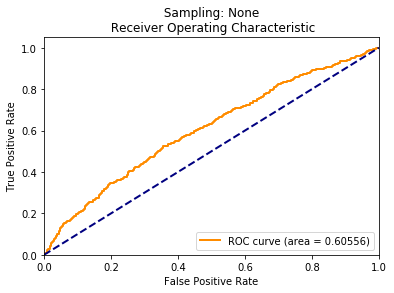

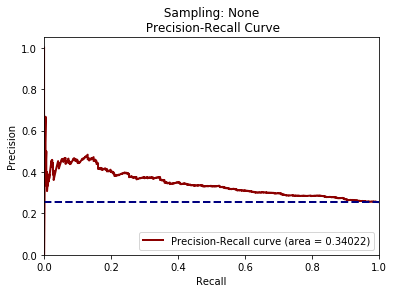


  
  
 
Performance Metrics Summary


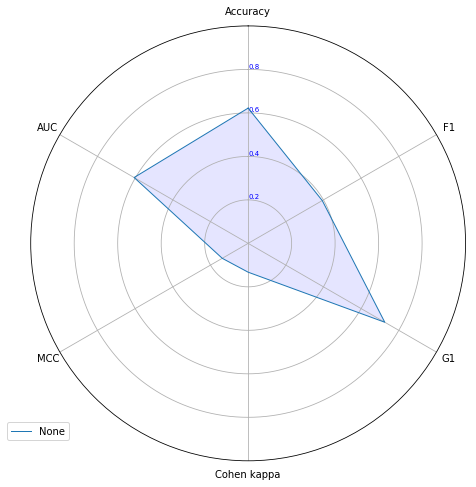

[('None',
  {'base_score': 0.5,
   'booster': 'gbtree',
   'colsample_bylevel': 1,
   'colsample_bynode': 1,
   'colsample_bytree': 1,
   'gamma': 5.182188752675684,
   'learning_rate': 0.5962763920912515,
   'max_delta_step': 3.0784719973980876,
   'max_depth': 85,
   'min_child_weight': 78.28715128054833,
   'missing': None,
   'n_estimators': 500,
   'n_jobs': -1,
   'nthread': None,
   'objective': 'reg:logistic',
   'random_state': 42,
   'reg_alpha': 0.8918393103229124,
   'reg_lambda': 0.7865529314354806,
   'scale_pos_weight': 11.881755436264289,
   'seed': None,
   'silent': None,
   'subsample': 1,
   'verbosity': 1})]

In [134]:
from xgboost import XGBClassifier
classifier = XGBClassifier
# preprocess
t1=feat_treat(X,y,42)
t1.check_na(50)
t1.handle_na('remove',t1.na_col)
t1.check_na()
t1.handle_na('median',t1.na_col)
t1.encode()
# test
t1.tune_test(tuning_iter=1,sample=False,model=classifier)
t1.metrics
t1.hyperparameters

In [144]:
print(keep2.hyperparameters[0])
keep2.metrics

('None', {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 14.32596925947269, 'learning_rate': 0.508372304291354, 'max_delta_step': 4.620724507132466, 'max_depth': 165, 'min_child_weight': 38.77594920607022, 'missing': None, 'n_estimators': 700, 'n_jobs': -1, 'nthread': None, 'objective': 'reg:logistic', 'random_state': 42, 'reg_alpha': 0.06132803720495006, 'reg_lambda': 0.9047342810749933, 'scale_pos_weight': 1.117336373590585, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1})


,Sampling,Accuracy,Precision,Recall,Specificity,Neg Pred Val,Confusion Sum,F1 score,F2 score,G1 score,Cohen kappa score,Brier score loss,MCC,AUC
0,None,0.74020,0.43210,0.07726,0.96549,0.75484,2.22969,0.13109,0.09244,0.84727,0.05865,0.18122,0.08940,0.63743
1,Random under sampling,0.25420,0.25378,1.00000,0.00075,1.00000,2.25453,0.40483,0.62969,0.00150,0.00038,0.53668,0.01380,0.64664
2,Random over sampling,0.65398,0.35135,0.43046,0.72993,0.79041,2.30215,0.38690,0.41191,0.75897,0.14930,0.24000,0.15079,0.61030
3,SMOTE,0.62486,0.33684,0.49448,0.66917,0.79572,2.29621,0.40072,0.45216,0.72698,0.14175,0.25858,0.14729,0.61649
4,SMOTE + TL,0.65230,0.33065,0.36203,0.75094,0.77597,2.21959,0.34563,0.35529,0.76325,0.10954,0.26496,0.10975,0.58329
5,Tomek link,0.25364,0.25364,1.00000,0.00000,0.00000,0.00000,0.40464,0.62952,0.00000,0.00000,0.44935,0.00000,0.64003
6,SMOTE + ENN,0.25364,0.25364,1.00000,0.00000,0.00000,0.00000,0.40464,0.62952,0.00000,0.00000,0.65572,0.00000,0.64472


In [145]:
print(keep1.hyperparameters[0][1])
keep1.metrics

{'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 129, 'max_features': 0.22716127607800715, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 0.013403803673352085, 'min_samples_split': 0.12395804966291306, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 700, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


,Sampling,Accuracy,Precision,Recall,Specificity,Neg Pred Val,Confusion Sum,F1 score,F2 score,G1 score,Cohen kappa score,Brier score loss,MCC,AUC
0,None,0.6271,0.36258,0.62031,0.62941,0.82987,2.44217,0.45765,0.5431,0.71587,0.20226,0.23049,0.21922,0.65835


In [264]:
# Feature treatment class
# Use to optimize feature selection, sampling, and hyperparameter tuning for model testing by creating instances of feature treatments 
# Stream-lines testing process and brings together packages like scikit-learn, skopt, pandas, numpy 
# returns performance metrics for treatments with visual

# Run Time: 
# RandomForestClassifier = 4.5 iterations/min
# XGBClassifier = 5.2 iterations/min

# required arguments: 
# X = feature pandas dataframe long format
# y = target pandas dataframe long format
# random_state = seed for pseudo random number generator to be used throughout treatments

# main dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from math import floor, ceil, pi
import copy
from random import randint
# scikit tools
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, precision_recall_curve,auc,cohen_kappa_score,accuracy_score,roc_auc_score,roc_curve,brier_score_loss,confusion_matrix,f1_score,recall_score,precision_score,matthews_corrcoef
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
# sampling tools
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek, SMOTEENN

class feat_treat:
    def __init__(self,X,y,random_state):
        self.X=X
        self.y=y
        self.random_state=random_state
        self.encoded=False
        self.na_col='update with check_na(percent_threshold,axis=1)'
        self.na_row='update with check_na(percent_threshold,axis=0)'
        self.metrics='No metrics available'
        self.hyperparameters='No hyperparameters available'
        
        # Low variance filter 
        # check variance of each column
        # remove column if variance is less than var_threshold
        drop=[]
        var_threshold = 0.004975
        for col in self.X.columns:
            if self.X[col].dtype!='object': 
                if np.var(self.X[col]) < var_threshold:
                    drop.append(col)
        self.X=self.X.drop(columns=drop)
        
        # GET TO KNOW YOUR DATA SET
        # return dataframe indices for categorical datatypes
        obj = [self.X.columns.get_loc(i) for i in self.X.columns if self.X[i].dtype == 'object']
        boolean = [self.X.columns.get_loc(i) for i in self.X.columns if self.X[i].dtype == 'bool']
        date = [self.X.columns.get_loc(i) for i in self.X.columns if self.X[i].dtype == 'datetime64']
        print("non-numeric column indices:")
        print('object type: ', obj)
        print('boolean type: ', boolean)
        print('date type: ', date, " \n")
        
    
        # return base rate
        unique_elements, counts_elements = np.unique(y, return_counts=True)
        DV_classes_df = pd.DataFrame({'Class': unique_elements,
                                      'Count': counts_elements})
        print(DV_classes_df.to_string(index=False),"\n ")
        print("Base rate: ",min(counts_elements)/sum(counts_elements))
    
    
    def copy(self,n=1):
        if n==1:
            return copy.deepcopy(self)
        elif n>1:
            # copy instance n times
            copies=[]
            for i in range(0,n):
                copies.append(copy.deepcopy(self))
            return tuple(copies)
    

    def check_na(self,percent_threshold=0, axis=1):
        if axis==1:
            num_col=self.X.shape[1]
            num_obs=self.X.shape[0]
            # column check for missing values  
            percent_missing = self.X.isnull().sum() * 100 / num_obs
            column_name = [percent_missing.index[i] for i in range(0,num_col) if percent_missing[i]>percent_threshold]
            percent_na = [percent_missing[i] for i in range(0,num_col) if percent_missing[i]>percent_threshold]
            missing_value_df = pd.DataFrame({'column_name': column_name,
                                             'percent_na': percent_na})
            missing_value_df.sort_values('percent_na', inplace=True)
            print(missing_value_df, "\n ")
            self.na_col=column_name
            print("Index stored in: self.na_col")
        if axis==0:
            num_col=self.X.shape[1]
            num_obs=self.X.shape[0]
            # row check for missing values
            percent_missing = self.X.isnull().sum(axis=1) * 100 / (num_col)
            row_index = [percent_missing.index[i] for i in range(0,num_obs) if percent_missing[i]>percent_threshold]
            percent_na = [percent_missing[i] for i in range(0,num_obs) if percent_missing[i]>percent_threshold]
            missing_value_df = pd.DataFrame({'row_index': row_index,
                                             'percent_na': percent_na})
            missing_value_df.sort_values('percent_na', inplace=True)
            print(missing_value_df, "\n ")
            self.na_row=row_index
            print("Index stored in: self.na_row")
    
    
    def handle_na(self,strategy=None,index=None,axis=1):
        # handle missing values
        # methods: mean, median, mode, value, remove
        if axis==1:
            if isinstance(strategy,int)==True or isinstance(strategy,float)==True:
                for i in index:
                    self.X[i]=self.X[i].fillna(strategy)
            else:
                strategy1=''.join(strategy.split()).lower()
                if strategy1=='mean':
                    for i in index:
                        mean=self.X[i].mean()
                        self.X[i].fillna(mean,inplace=True)
                elif strategy1=='median':
                    for i in index:
                        median=self.X[i].median()
                        self.X[i].fillna(median,inplace=True)                            
                elif strategy1=='mode':
                    for i in index:
                        mode = self.X[i].mode()[0]
                        self.X[i].fillna(mode,inplace=True)                      
                elif strategy1=='remove':
                    self.X.drop(columns=index,inplace=True) 
                elif strategy1=='random':
                    for i in index:
                        uniques = np.unique(self.X[i])
                        uniques = uniques[~np.isnan(uniques)]
                        for j in range(0,len(self.X[i])):
                            if np.isnan(self.X.loc[self.X.index[j],i])==True:
                                self.X.loc[self.X.index[j],i] = np.random.choice(uniques)
    #             elif strategy1=='mice': # mice will perform impute on all columns
    #                 from impyute.imputation.cs import mice
    #                 col=self.X.columns
    #                 X_imp=mice(self.X)
    #                 self.X=pd.DataFrame(X_imp, columns=col)
                else:
                    for i in index:
                        self.X[i].fillna(strategy,inplace=True)     
        elif axis==0:               
             self.X.drop(index=index, axis=0,inplace=True)
    
    
    def pcc_filter(self,k):
        if isinstance(k,int)==True or isinstance(k,float)==True:
            # check pearson coefficient for linear correlation between DV and each feature 
            # remove column if PCC is less than correlation limit
            df=pd.concat([self.y, self.X], axis=1, ignore_index=True)
#           create pearson correlation coefficient matrix
            cor = df.corr()
            corr_limit=k
            cor_target = abs(cor.iloc[:,0])
            relevant_features = cor_target[cor_target>corr_limit]
            relevant_features=relevant_features.iloc[1:]
            rel_col =[]
            for i in relevant_features.index:
                rel_col.append(i-1) 
#           drop all columns except relevant ones
            self.X=self.X.iloc[:,rel_col]
#           check which columns are kept 
            keep_col=self.X.columns
            print(keep_col)
            print(len(keep_col))            
#       section to include pcc optimization loop
        else:
            k = ''.join(k.split()).lower()
            k = k[:3]
            if k == 'opt':
                pass

    
    
    def collinear(self,k):
#       check pearson coefficient for linear correlation between features (collinearity)
#       remove if PCC is greater than collinear limit
#       recreate pearson correlation matrix
        cor = self.X.corr()
        feat_targets=[]
        feat_remove=[]
        ignore=[]
#       set correlation limit
        colinear_corr_limit=k
#       check for collinearity
        for i in self.X.columns:
            cor_target = abs(cor.loc[:,i])
            feat_targets.append((i,cor_target[cor_target>colinear_corr_limit]))  
        # remove collinear features
        for i in feat_targets:
            ignore.append(i[0])
            for j in i[1].index:
                if j not in ignore:
                    feat_remove.append(j)

        feat_remove=set(feat_remove)
        self.X=self.X.drop(columns=feat_remove)
        # check which columns are kept 
        keep_col=self.X.columns
        print("columns remaining: ",keep_col)
        print(len(keep_col), " columns")

    def check_cat(self):
        categorical_columns=[i for i in self.X.columns if (self.X[i].dtype != 'float64' and self.X[i].dtype != 'int64')]
        print(categorical_columns)
    
    def encode(self, strategy=None, cat_col=None):
        if cat_col==None:
            cat_col=[i for i in self.X.columns if (self.X[i].dtype != 'float64' and self.X[i].dtype != 'int64')]
        if(strategy=='dummy'):
            self.X=pd.get_dummies(self.X, columns=cat_col)
            self.encoded=True   
        elif strategy == None or strategy == 'label':
            if len(cat_col)>0:
                le = preprocessing.LabelEncoder()
                for col in cat_col:
                    self.X[col]=le.fit_transform(self.X[col])            
                self.encoded=True
            else:
                print("No categorical variables in data set")
        

    def rfe(self,n=None,cum=None,rfe_model=None):
        if isinstance(n,int)==True and cum==None:
            if rfe_model==None:
                from sklearn.linear_model import LogisticRegression
                rfe_model=LogisticRegression(solver='lbfgs')
                kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=self.random_state)
                selector = RFECV(estimator=rfe_model, min_features_to_select = n, cv=kfold, n_jobs=-1).fit(self.X,self.y)
                keep = [i for i in range(0,len(selector.support_)) if selector.support_[i]==True]
                self.X=self.X.iloc[:,keep]
            else:
                kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=self.random_state)
                selector = RFECV(estimator=rfe_model, min_features_to_select = n, cv=kfold, n_jobs=-1).fit(self.X,self.y)
                keep = [i for i in range(0,len(selector.support_)) if selector.support_[i]==True]
                self.X=self.iloc[:,keep]
        elif isinstance(cum,float)==True and n==None:
            # cumulative feature importance
            pass
        else:    
            n = ''.join(n.split()).lower()
            n = n[:3]
            if n == 'opt':
                if rfe_model==None:               
                    if self.X.shape[1]>1000:
                        steps=int((round(floor(self.X.shape[1]),-3)/1000)*8)
                    else:
                        steps=1
                    nof_list=np.arange(self.X.shape[1]-1,1,step=-steps)
                    #print(nof_list)
                    check_point=np.arange(1,self.X.shape[1]-1,step=floor(0.1*self.X.shape[1]))
                    #print(check_point)
                    high_score=0
                    #Variable to store the optimum features
                    n_best=0           
                    score_list =[]
                    X_train, X_test, y_train, y_test = train_test_split(self.X,self.y, test_size = 0.2, random_state = self.random_state)
                    print("Optimizing...")
                    for i in nof_list:
                        #print("Testing n = ",i)
                        num_col=X_train.shape[1]
                        from sklearn.linear_model import LogisticRegression
                        rfe_model=LogisticRegression(solver='lbfgs')
                        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=self.random_state)
                        selector = RFECV(estimator=rfe_model, min_features_to_select = i, cv=kfold, n_jobs=-1).fit(X_train,y_train)
                        X_train_rfe=selector.transform(X_train)
                        cols_kept = selector.get_support(indices=True)
                        drop_cols=set(np.arange(0,num_col))-set(cols_kept)
                        drop_cols=list(drop_cols)
                        X_test_rfe=selector.transform(X_test)
                        model=LogisticRegression(solver='lbfgs')
                        model.fit(X_train_rfe,y_train)
                        preds = model.predict(X_test_rfe)
                        score = roc_auc_score(y_test, preds)
                        score_list.append(score)
                        if(score>high_score):
                            high_score = score
                            n_best = i
                        if i in check_point:
                            print(" Best n so far: {} \n Score: {} \n".format(n_best,high_score))
                        X_train=X_train.drop(X_train.columns[drop_cols],axis=1) 
                        X_test=X_test.drop(X_test.columns[drop_cols],axis=1) 
                    print("Optimal n: {} \n Score: {} \n".format(n_best,high_score))    
                    rfe_model=LogisticRegression(solver='lbfgs')
                    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=self.random_state)
                    selector = RFECV(estimator=rfe_model, min_features_to_select = n_best, cv=kfold, n_jobs=-1).fit(self.X,self.y)
                    keep = [i for i in range(0,len(selector.support_)) if selector.support_[i]==True]
                    self.X=self.X.iloc[:,keep]


                else: 
                    #allow for other model support
                    pass
            

    def skb(self,k,score_func=None):
        cat_col=[self.X.columns.get_loc(i) for i in self.X.columns if self.X[i].dtype == 'object']
        if isinstance(k,int)==True or isinstance(k,float)==True:
            if score_func==None:
                from sklearn.feature_selection import chi2
                skb =SelectKBest(score_func=chi2, k=k).fit(self.X,self.y)
                self.X = self.X.iloc[:,skb.get_support(indices=True)]
            else:
                from sklearn.feature_selection import score_func
                skb = SelectKBest(score_func=score_func, k=k).fit(self.X,self.y)
                self.X = self.X.iloc[:,skb.get_support(indices=True)]
#           section to include optimization loop
        else:
            k = ''.join(k.split()).lower()
            k = k[:3]
            if k == 'opt':
                if self.X.shape[1]>1000:
                    steps=int((round(floor(self.X.shape[1]),-3)/1000)*2)
                else:
                    steps=1
                kof_list=np.arange(self.X.shape[1]-1,1,step=-steps)
                print(kof_list)
                check_point=np.arange(1,self.X.shape[1]-1,step=floor(0.1*self.X.shape[1]))
                print(check_point)
                high_score=0
                #Variable to store the optimum features
                k_best=0           
                score_list =[]
                X_train, X_test, y_train, y_test = train_test_split(self.X,self.y, test_size = 0.2, random_state = self.random_state)
                print("Optimizing...")
                for i in kof_list:
                    print("Testing n = ",i)
                    if score_func==None:
                        from sklearn.feature_selection import chi2
                        skb = SelectKBest(score_func=chi2, k=i).fit(X_train,y_train)
                    else:
                        from sklearn.feature_selection import score_func
                        skb = SelectKBest(score_func=chi2, k=i).fit(X_train,y_train)                
                    X_train_skb = X_train.iloc[:,skb.get_support(indices=True)]
                    from sklearn.linear_model import LogisticRegression
                    model=LogisticRegression(solver='liblinear')
                    model.fit(X_train_skb,y_train)
                    preds = model.predict(X_test_skb)
                    score = roc_auc_score(y_test, preds)
                    score_list.append(score)
                    if(score>high_score):
                        high_score = score
                        k_best = i
                    if i in check_point:
                        print(" Best k so far: {} \n Score: {} \n".format(k_best,high_score)) 
                print("Optimal k: {} \n Score: {} \n".format(k_best,high_score))    
                skb = SelectKBest(score_func=chi2, k=k_best).fit(self.X,self.y)
                self.X = self.X.iloc[:,skb.get_support(indices=True)]

            
            
    def svd(self,n=None, var=None):
        if var==None and isinstance(n,int)==True:
            col = self.X.columns
            svd = TruncatedSVD(n_components=n, n_iter=5, random_state=self.random_state).fit(self.X)
            self.X = pd.DataFrame(svd.transform(self.X), columns=['SV %i' % i for i in range(n)], index=self.X.index)
        elif n==None and isinstance(var,float)==True:
            n=min(self.X.shape[1], self.X.shape[0])
            exp_var = 0
            svd = TruncatedSVD(n_components=n, n_iter=5, random_state=self.random_state).fit(self.X) 
            j=0
            exp_var=0
            while exp_var<var and j<n:
                exp_var = exp_var + svd.explained_variance_ratio_[j]
                j=j+1
            svd = TruncatedSVD(n_components=j, n_iter=5, random_state=self.random_state).fit(self.X) 
            self.X = pd.DataFrame(svd.transform(self.X), columns=['SV %i' % i for i in range(j)], index=self.X.index)
#       section to include optimization loop
        else:
            n = ''.join(n.split()).lower()
            n = n[:3]
            if n == 'opt':
                max_n=floor(0.8*min(self.X.shape[1], self.X.shape[0]))
                nof_list=np.arange(max_n,1,step=-1)
                #print(nof_list)
                check_point=np.arange(1,max_n-1,step=floor(0.1*max_n))
                #print(check_point)
                high_score=0
                #Variable to store the optimum features
                n_best=0           
                score_list =[]
                X_train, X_test, y_train, y_test = train_test_split(self.X,self.y, test_size = 0.2, random_state = self.random_state)
                print("Optimizing...")
                for i in nof_list:
                    svd = TruncatedSVD(n_components=i, n_iter=5, random_state=self.random_state)
                    X_train_svd=svd.fit_transform(X_train)
                    X_test_svd=svd.transform(X_test)
                    from sklearn.linear_model import LogisticRegression
                    model=LogisticRegression(solver='liblinear')
                    model.fit(X_train_svd,y_train)
                    preds = model.predict(X_test_svd)
                    score = roc_auc_score(y_test, preds)
                    score_list.append(score)
                    if(score>high_score):
                        high_score = score
                        n_best = i
                    if i in check_point:
                        print(" Best n so far: {} \n Score: {} \n".format(n_best,high_score)) 
                print("Optimal n: {} \n Score: {} \n".format(n_best,high_score))    
                svd = TruncatedSVD(n_components=n_best, n_iter=5, random_state=self.random_state).fit(self.X)
                self.X = pd.DataFrame(svd.transform(self.X), columns=['SV %i' % i for i in range(n_best)], index=self.X.index)                       

            
    def pca(self,n=None,var=None):
        if var==None and isinstance(n,int)==True:
            pca = PCA(n_components=n, svd_solver='auto', random_state=self.random_state).fit(self.X) 
            self.X = pd.DataFrame(pca.transform(self.X), columns=['PCA %i' % i for i in range(n)], index=self.X.index) 
        elif n==None and isinstance(var,float)==True:
            n=min(self.X.shape[1], self.X.shape[0])
            exp_var = 0
            pca = PCA(n_components=n, svd_solver='auto', random_state=self.random_state).fit(self.X) 
            j=0
            exp_var=0
            while exp_var<var and j<n:
                exp_var = exp_var + pca.explained_variance_ratio_[j]
                j=j+1
            pca = PCA(n_components=j, random_state=self.random_state).fit(self.X) 
            self.X = pd.DataFrame(pca.transform(self.X), columns=['PCA %i' % i for i in range(j)], index=self.X.index) 
#       section to include optimization loop
        else:
            n = ''.join(n.split()).lower()
            n = n[:3]
            if n == 'opt':
                max_n=floor(0.8*min(self.X.shape[1], self.X.shape[0]))
                nof_list=np.arange(max_n-1,1,step=-1)
                #print(nof_list)
                check_point=np.arange(1,max_n-1,step=floor(0.1*max_n))
                #print(check_point)
                high_score=0
                #Variable to store the optimum features
                n_best=0           
                score_list =[]
                X_train, X_test, y_train, y_test = train_test_split(self.X,self.y, test_size = 0.2, random_state = self.random_state)
                print("Optimizing...")
                for i in nof_list:
                    #print("Testing n = ",i)
                    pca = PCA(n_components=i, random_state=self.random_state)
                    X_train_pca=pca.fit_transform(X_train)
                    X_test_pca=pca.transform(X_test)
                    from sklearn.linear_model import LogisticRegression
                    model=LogisticRegression(solver='liblinear')
                    model.fit(X_train_pca,y_train)
                    preds = model.predict(X_test_pca)
                    score = roc_auc_score(y_test, preds)
                    score_list.append(score)
                    if(score>high_score):
                        high_score = score
                        n_best = i
                    if i in check_point:
                        print(" Best n so far: {} \n Score: {} \n".format(n_best,high_score)) 
                print("Optimal n: {} \n Score: {} \n".format(n_best,high_score))    
                pca = PCA(n_components=n_best, random_state=self.random_state).fit(self.X) 
                self.X = pd.DataFrame(pca.transform(self.X), columns=['PCA %i' % i for i in range(n_best)], index=self.X.index) 
    
    @staticmethod
    def performance_metrics(y_test, probs, pred_threshold=0.5, sample_method_label='None', index=0, verbose=True):
#       returns dataframe of various performance metrics
        probs1 = probs[:,1]
        preds=[]
        for prediction in probs1:
            if prediction >= pred_threshold:
                preds.append(1)
            else:
                preds.append(0)
        fpr, tpr, threshold = roc_curve(y_test, probs1)
        auc_score = round(auc(fpr,tpr),5)
        prec, rec, threshold_pr = precision_recall_curve(y_test, probs1)
        auc_pr_curve = round(auc(rec, prec),5)
        conf_mat = confusion_matrix(y_true=y_test, y_pred=preds)
        accuracy = round(accuracy_score(y_test, preds),5)
        ck = round(cohen_kappa_score(y_test,preds),5)
        brier = round(brier_score_loss(y_test,probs1) ,5)
        f1 = round(f1_score(y_test, preds),5)
    #               jaccard = jaccard_score(y_test, preds)
        recall = round(recall_score(y_test, preds),5)
        precision = round(precision_score(y_test, preds),5)
        mcc = round(matthews_corrcoef(y_test, preds),5)
        specificity=round(conf_mat[0][0] / (conf_mat[0][0]+conf_mat[0][1]),5)
        neg_pred= round(conf_mat[0][0] / (conf_mat[0][0]+conf_mat[1][0]),5)
        f2=round(5*((precision*recall)/((4*precision)+recall)),5)
        g1=round(2*((specificity*neg_pred)/(specificity+neg_pred)),5)
        conf_sum =round(precision+recall+specificity+neg_pred,5)
    #               rmse = np.sqrt(mean_squared_error(y_test, preds))
        if verbose==True:
            print("Accuracy:          ", accuracy)
            print('Precision:         ', precision)
            print('Recall:            ', recall)
            print('Specificity:       ', specificity)
            print('Neg Pred Val:      ', neg_pred)
            print('Confusion Sum:     ', conf_sum)                
            print(' ')
            print('F1 score:          ', f1)
            print('F2 score:          ', f2)
            print('G1 score:          ', g1)
            print('Cohen kappa score: ', ck)
        #               print("RMSE:              ", rmse)
            print(' ')
        #               print("Jaccard score:     ", jaccard)
            print("Brier score loss:  ", brier)
            print('MCC:               ', mcc)
            print("AUC:               ", auc_score, "\n") 
        #-------- ROC CURVE --------------
            plt.figure()
            lw=2
            plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = {})'.format(auc_score))
            plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(' Sampling: {} \n Receiver Operating Characteristic'.format(sample_method_label))
            plt.legend(loc="lower right")
            plt.show()    
        #-----------------------------------
        #-------- Precision-Recall CURVE --------------
            unique_elements, counts_elements = np.unique(y_test, return_counts=True)
            no_skill=counts_elements[1]/sum(counts_elements)
            plt.figure()
            plt.plot(rec, prec, color='darkred',lw=lw, label='Precision-Recall curve (area = {})'.format(auc_pr_curve))
            plt.plot([0, 1], [no_skill, no_skill], color='navy', lw=lw, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title(' Sampling: {} \n Precision-Recall Curve'.format(sample_method_label))
            plt.legend(loc="lower right")
            plt.show()
            print("\n ","\n ","\n ")
        else:
            pass
#       update self.metrics data
        df=pd.DataFrame({"Sampling" : sample_method_label,
                    "Accuracy" : accuracy,
                    'Precision' : precision,
                    'Recall' : recall,
                    'Specificity' : specificity,
                    'Neg Pred Val' : neg_pred,
                    'Confusion Sum' : conf_sum,
                    'F1' : f1,
                    'F2' : f2,
                    'G1' : g1,
                    'Cohen kappa' : ck,
#                   "RMSE" : rmse,
#                   "Jaccard score" : jaccard,
                    "Brier score loss" : brier,
                    'MCC' : mcc,
                    "AUC" : auc_score},index=[index])
        df=df.fillna(0)
        return df
    
    @staticmethod
    def select_hyperparameter_grid(model,feature_set, random_state=42):
        col_length=len(feature_set.columns)
#       IMPORTANT when inputting default hyperparameters:
#       wrap non-int or non-float types with Categorical() function
#       NEVER input int or float types with only one parameter option... this will not work with bayes search (works fine with randomized search)
        if("RandomForest" in str(model)):
#           default hyperparameter testing range
            bootstrap = Categorical([True, False])
            n_estimators = [300,500,700]
            criterion= Categorical(['gini','entropy'])
            max_depth =np.arange(1,floor(col_length),1)
            max_features = np.random.uniform(0.01,1,10000)
            min_samples_split = np.random.uniform(0.01,1,10000)
            min_samples_leaf = np.random.uniform(0.0001,0.5,10000)
            class_weight = Categorical(['balanced','balanced_subsample',None])
            n_jobs = [-1]
            random_state = [random_state]
#           input hyperparameters into dictionary
            param_grid = dict(n_estimators=n_estimators,
                              bootstrap=bootstrap, 
                              criterion=criterion,
                              min_samples_leaf=min_samples_leaf, 
                              min_samples_split=min_samples_split,
                              max_features=max_features,
                              max_depth=max_depth,
                              class_weight=class_weight,
                              n_jobs=n_jobs,
                              random_state=random_state)

        elif("XGB" in str(model)):
#           default hyperparameter testing range
            booster = Categorical(['gbtree','gblinear','dart'])
            n_estimators = [300,500,700]
            learning_rate = np.random.uniform(0.000001,1,10000)
            max_depth = np.arange(1,floor(col_length),1)
            gamma = np.random.uniform(0,15,10000)
            reg_alpha = np.random.uniform(0,1,10000)
            reg_lambda = np.random.uniform(0,1,10000)
            objective = Categorical(['reg:logistic'])
            #subsample = np.random.beta(2,5,10000)
            #colsample_bytree = np.random.beta(2,5,10000)
            scale_pos_weight = np.random.uniform(0,20,10000)
            min_child_weight = np.random.uniform(0,floor(0.5*col_length),10000)
            max_delta_step = floor(0.2*col_length)*np.random.beta(2,5,10000)
            n_jobs = [-1]
            random_state = [random_state]
#           input hyperparameters into dictionary
            param_grid = dict(n_estimators=n_estimators,
                              booster=booster,
                              learning_rate=learning_rate,
                              max_depth=max_depth,
                              gamma=gamma,
                              reg_alpha=reg_alpha,
                              reg_lambda=reg_lambda,
                              objective=objective,
                              #subsample=subsample,
                              #colsample_bytree=colsample_bytree,
                              scale_pos_weight=scale_pos_weight,
                              min_child_weight=min_child_weight,
                              max_delta_step=max_delta_step,
                              n_jobs=n_jobs,
                              random_state=random_state)          

        elif("LogisticRegression" in str(model)):
#           default hyperparameter testing range
            penalty = Categorical(['l2'])
            tol = np.random.uniform(0.00000001,0.001,10000)
            C = np.random.uniform(0.000001,100,10000)
            fit_intercept = Categorical([True,False])
            intercept_scaling = np.random.uniform(0.01,10,10000)
            class_weight = Categorical(['balanced',None])
            solver = Categorical(['newton-cg', 'lbfgs','sag'])
            max_iter = np.arange(100,1000,10)
            n_jobs = [-1]
            random_state = [random_state]
#           input hyperparameters into dictionary
            param_grid = dict(penalty=penalty,
                              tol=tol,
                              C=C,
                              fit_intercept=fit_intercept,
                              intercept_scaling=intercept_scaling,
                              class_weight=class_weight,
                              solver=solver,
                              max_iter=max_iter,
                              n_jobs=n_jobs,
                              random_state=random_state)
        elif("SVC" in str(model)):
#           default hyperparameter testing range
            C=np.random.gamma(1.4,9,10000)
            kernel=Categorical(['rbf','poly','sigmoid'])
            degree=np.arange(1,20,1)
            gamma=np.random.uniform(0,25,10000)
            coef0=np.random.gamma(0.1,1,10000)
            shrinking=Categorical([True,False])
            probability=Categorical([True])
            tol=np.random.uniform(0.00000001,0.001,10000)
            class_weight=Categorical(['balanced',None])
            random_state=[random_state]
#           input hyperparameters into dictionary
            param_grid = dict(C=C,
                              kernel=kernel,
                              degree=degree,
                              gamma=gamma,
                              coef0=coef0,
                              shrinking=shrinking,
                              probability=probability,
                              tol=tol,
                              class_weight=class_weight,
                              random_state=random_state)

        #elif("Bagging" in str(model_rep)):
        elif("multilayer_perceptron" in str(model)):
#           default hyperparameter testing range
            neurons = [i for i in range(floor(col_length*0.05),floor(col_length*0.9),3)]
            hidden_layer_sizes = [(i,)*j for i in neurons for j in range(1,4)]
            activation = Categorical(['relu'])
            solver = Categorical(['sgd','adam'])
            tol = np.random.uniform(0.00000001,0.001,1000)
            alpha = 10.0 ** -np.random.uniform(1, 11,10000)
            learning_rate = Categorical(['constant', 'invscaling', 'adaptive'])
            learning_rate_init = 10.0 ** -np.random.uniform(2, 11,10000)
            momentum = np.random.uniform(0.01,1,10000)
            nesterovs_momentum = Categorical([True, False])
            power_t = np.random.uniform(0.01,2,10000)
            max_iter = np.arange(500,1000,100)
            random_state = [random_state]
            beta_1 = np.random.uniform(0,1,10000)
            beta_2 = np.random.uniform(0,1,10000)
#           input hyperparameters into dictionary
            param_grid = dict(hidden_layer_sizes=hidden_layer_sizes,
                              activation=activation, 
                              solver=solver,
                              tol=tol,
                              alpha=alpha,
                              learning_rate=learning_rate,
                              learning_rate_init=learning_rate_init,
                              nesterovs_momentum=nesterovs_momentum,
                              momentum=momentum,
                              power_t=power_t,
                              max_iter=max_iter,
                              beta_1=beta_1,
                              beta_2=beta_2,
                              random_state=random_state)
        return param_grid

    @staticmethod
    def create_radar_chart(radar_df):
        # max display 4 best plots
        # more plots than this becomes confusing
        while (radar_df.shape[0])>4:
            # drop row with lowest AUC score for display purposes
            low_score_row=[radar_df['AUC'].idxmin()]
            radar_df = radar_df.drop(index=low_score_row)
            radar_df.reset_index(drop=True,inplace=True)
        # ------- RADAR CHARTS PART 1: Create background
        # number of variables
        categories=list(radar_df)[1:]
        N = len(categories)
        # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
        angles = [n / float(N) * 2 * pi for n in range(N)]
        angles += angles[:1]
        # Initialise the spider plot
        fig = plt.figure(figsize=(8,8))
        ax = plt.subplot(111, polar=True)
        # If you want the first axis to be on top:
        ax.set_theta_offset(pi / 2)
        ax.set_theta_direction(-1)
        # Draw one axe per variable + add labels labels yet
        plt.xticks(angles[:-1], categories)
        # Draw ylabels
        ax.set_rlabel_position(0)
        plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="blue", size=7)
        plt.ylim(0,1)
        # ------- PART 2: Add plots
        # Plot each individual = each line of the data
        labels=[i for i in radar_df['Sampling']]
        colors=['blue', 'orange', 'green', 'red']
        colors=colors[:len(labels)]
        for i in range(0,len(labels)):
            values=radar_df.loc[i].drop('Sampling').values.flatten().tolist()
            values += values[:1]
            values = [abs(number) for number in values]
            ax.plot(angles, values, linewidth=1, linestyle='solid', label=labels[i])
            ax.fill(angles, values, colors[i], alpha=0.1)
        # Add legend
        plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
        return plt    

    @staticmethod
    def resampler(sample, X_train, y_train):
        col=X_train.columns
        if sample==False:
            samples = [(X_train,y_train,"None")]
        else:
            if sample==True:
                sample=['rus','ros','smote','smote+tl','tl','smote+enn']
            else:
                pass
            samples = [(X_train,y_train,"None")]
            for i in sample:
                i=''.join(i.split()).lower()                    
                if i in ['rus','randomundersampling','randomundersample']:
                    rus = RandomUnderSampler()
                    X_rus, y_rus = rus.fit_sample(X_train, y_train)
                    X_rus = pd.DataFrame(X_rus, columns = col)
                    samples.append(tuple([X_rus,y_rus,"Random under sampling"]))
                
                elif i in ['ros','randomoversampling','randomoversample']:
                    ros = RandomOverSampler()
                    X_ros, y_ros = ros.fit_sample(X_train, y_train)
                    X_ros = pd.DataFrame(X_ros, columns = col)
                    samples.append(tuple([X_ros,y_ros,"Random over sampling"]))
                
                elif i in ['smote']:
                    smote = SMOTE(ratio='minority')
                    X_sm, y_sm = smote.fit_sample(X_train, y_train)
                    X_sm = pd.DataFrame(X_sm, columns = col)
                    samples.append(tuple([X_sm,y_sm,"SMOTE"]))
                
                elif i in ['smotetl','smote+tl','tlsmote','tl+smote']:
                    smt = SMOTETomek(ratio='auto')
                    X_smt, y_smt = smt.fit_sample(X_train, y_train)
                    X_smt = pd.DataFrame(X_smt, columns = col)
                    samples.append(tuple([X_smt,y_smt,"SMOTE + TL"]))
                    
                elif i in ['smoteenn','smotenn','ennsmote','smote+enn','enn+smote']:
                    sme = SMOTEENN(ratio='auto')
                    X_sme, y_sme = sme.fit_sample(X_train, y_train)
                    X_sme = pd.DataFrame(X_sme, columns = col)
                    samples.append(tuple([X_sme,y_sme,"SMOTE + ENN"]))
                    
                elif i in ['tl','tomek','tomeklink','tomeklinks']:
                    tl=TomekLinks(sampling_strategy='all')
                    X_tl, y_tl = tl.fit_sample(X_train,y_train)
                    X_tl = pd.DataFrame(X_tl, columns = col)
                    samples.append(tuple([X_tl,y_tl,"Tomek link"]))
        
        return samples        
    
    def tune_test(self,model,tuning_iter,sample=True,tuning_strategy='randomized',tuning_metric='roc_auc',test_size=0.2, skfold=8):
#       split into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=test_size, random_state=self.random_state)
#       test set will remain untouched until making predictions with tuned model
        col = X_train.columns
        col_length=len(X_train.columns)
#       instantiate cv stratified fold
        inner_kfold = StratifiedKFold(n_splits=skfold, shuffle=True, random_state=self.random_state)
        #outer_kfold = StratifiedKFold(n_splits=skfold, shuffle=True, random_state=self.random_state)
        if("multilayer_perceptron" in str(model)):
            #standardize data sets
            scaler = StandardScaler().fit(X_train)        
            X_train = pd.DataFrame(scaler.transform(X_train), columns=col, index=X_train.index) 
            X_test = pd.DataFrame(scaler.transform(X_test), columns=col, index=X_test.index)
        else: 
            pass
        
        param_grid = self.select_hyperparameter_grid(model=model,feature_set=X_train,random_state=self.random_state)    
        samples = self.resampler(sample=sample,X_train=X_train,y_train=y_train)
        
#       tune and test
        N = len(samples)
#       check that tuning_iter and number of samples agree
        if N > tuning_iter:
            tuning_iter = N
        best_param=[0]*N            
        self.metrics=pd.DataFrame(columns=["Sampling",
                                           "Accuracy",
                                           'Precision',
                                           'Recall',
                                           'Specificity',
                                           'Neg Pred Val',
                                           'Confusion Sum',
                                           'F1', 
                                           'F2',
                                           'G1',
                                           'Cohen kappa',
#                                              "RMSE" : rmse,
#                                              "Jaccard score" : jaccard,
                                           "Brier score loss",
                                           'MCC',
                                           "AUC"])
#       copy uninstantiated model for replacement within loop
        model_rep=model
        print("Estimator: ",model_rep, " \n ")
        for i in range(0,N):
#           instantiate model for tuning purposes
            model_inst=model_rep()
            print("Sampling technique: ",samples[i][2], "\n ")
            tuning_strategy=''.join(tuning_strategy.split()).lower()
#           check for bayes or random search
            if tuning_strategy=='bayes':
                # unpack hyperparameters
                param_grid_cat = {k: v for k, v in param_grid.items() if isinstance(v,Categorical)==True or k=='n_jobs' or k=='random_state'}
                param_grid_num = {k:(min(v),max(v)) for k,v in param_grid.items() if k not in param_grid_cat}
                param_grid={**param_grid_num,**param_grid_cat}
                import warnings
                warnings.filterwarnings('ignore', message='The objective has been evaluated at this point before.')
                grid_search = BayesSearchCV(model_inst, param_grid, scoring=tuning_metric, n_jobs=-1, n_points=4, cv=inner_kfold, n_iter=floor(tuning_iter/N),verbose=0)
            elif tuning_strategy=='randomized':
                grid_search = RandomizedSearchCV(model_inst, param_grid, scoring=tuning_metric, n_jobs=-1, pre_dispatch='2*n_jobs', refit=True, cv=inner_kfold, n_iter=floor(tuning_iter/N),verbose=0)
            print('Tuning...')
            grid_results=grid_search.fit(samples[i][0],samples[i][1])
            best_param[i]=(samples[i][2], grid_results.best_estimator_.get_params())
            print("Best {}: {} using {} \n".format(tuning_metric, grid_results.best_score_, best_param[i][1]))
            print("Validating model...")
#           Train model
            #model = grid_search.best_estimator_
            del grid_results
            model=model_rep(**best_param[i][1])
            model.fit(samples[i][0],samples[i][1])
            probs = model.predict_proba(X_test[samples[i][0].columns])
            #return performance metrics
            df = self.performance_metrics(y_test=y_test,probs=probs, pred_threshold=0.5, sample_method_label=samples[i][2],index=i)
            self.metrics=self.metrics.append(df)
#           end of loop
        self.hyperparameters=best_param
        #self.metrics=self.metrics.fillna(0)    
        radar_df=self.metrics[['Sampling',
                                'Accuracy',
                                'F1', 
                                'G1',
                                'Cohen kappa',
                                'MCC',
                                'AUC']]
        print("Performance Metrics Summary")
        radar_plot = self.create_radar_chart(radar_df=radar_df)
        radar_plot.show()

        
        
        
    def multi_test_split_validation(self, model, params, iterations, sample = False, test_size = 0.2):
#       use to validate best hyperparameters by averaging results of multiple random test split iterations
#       initialize metrics dataframe
        metrics_log=pd.DataFrame(columns=["Sampling",
                                           "Accuracy",
                                           'Precision',
                                           'Recall',
                                           'Specificity',
                                           'Neg Pred Val',
                                           'Confusion Sum',
                                           'F1', 
                                           'F2',
                                           'G1',
                                           'Cohen kappa',
#                                              "RMSE" : rmse,
#                                              "Jaccard score" : jaccard,
                                           "Brier score loss",
                                           'MCC',
                                           "AUC"])
        model_rep=model
        random = np.arange(self.random_state,self.random_state+iterations)
        random = [num*randint(1,self.random_state*iterations) for num in random]
        print('Random states: ',random)
        for j in range(0,iterations):    
#           split into training and test sets
            X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=test_size, random_state=random[j])
            samples = self.resampler(sample=sample,X_train=X_train,y_train=y_train)
            N=len(samples)
            for i in range(0,N):
                if isinstance(params, list)==True:
                    fitted=0
                    for k in params:
                        if k[0] == samples[i][2]:
                            param = k[1]
                            param.update({'random_state':random[j]})
                            model=model_rep(**param)
                            model.fit(samples[i][0],samples[i][1])
                            probs = model.predict_proba(X_test[samples[i][0].columns])
                            df = self.performance_metrics(y_test=y_test,probs=probs, pred_threshold=0.5, sample_method_label=samples[i][2],index=(N*j)+i, verbose=False)
                            metrics_log=metrics_log.append(df)
                            fitted=fitted+1
                        else:
                            pass
                    if fitted==0:
                        param = params[0][1]
                        param.update({'random_state':random[j]})
                        model=model_rep(**param)
                        model.fit(samples[i][0],samples[i][1])
                        probs = model.predict_proba(X_test[samples[i][0].columns])
                        df = self.performance_metrics(y_test=y_test,probs=probs, pred_threshold=0.5, sample_method_label=samples[i][2],index=(N*j)+i, verbose=False)
                        metrics_log=metrics_log.append(df)
                    else:
                        pass
                else:            
                    params.update({'random_state':random[j]})
                    model=model_rep(**params)
                    model.fit(samples[i][0],samples[i][1])
                    probs = model.predict_proba(X_test[samples[i][0].columns])
                    df = self.performance_metrics(y_test=y_test,probs=probs, pred_threshold=0.5, sample_method_label=samples[i][2],index=(N*j)+i, verbose=False)
                    metrics_log=metrics_log.append(df)
#       return dataframe of average column scores of each sampling method
        ave_metrics = metrics_log.groupby("Sampling").mean()
        ave_metrics.reset_index(level="Sampling", inplace=True)
        self.metrics = ave_metrics
        simple_ave_metrics = ave_metrics[['Sampling',
                                 'Accuracy',
                                 'F1', 
                                 'G1',
                                 'Cohen kappa',
                                 'MCC',
                                 'AUC']]
        radar_plot = self.create_radar_chart(radar_df=simple_ave_metrics)
        radar_plot.show()
        

In [265]:
from xgboost import XGBClassifier
classifier = XGBClassifier
# preprocess
t1=feat_treat(X,y,42)
t1.check_na(50)
t1.handle_na('remove',t1.na_col)
t1.check_na()
t1.handle_na('median',t1.na_col)
t1.encode()

non-numeric column indices:
object type:  [1, 2, 4, 5, 27, 70, 86, 162, 164, 165, 166, 167, 172, 173]
boolean type:  []
date type:  []  

 Class  Count
     0   6640
     1   2290 
 
Base rate:  0.2564389697648376
                 column_name  percent_na
1  ind_number_of_trade_lines   78.230683
0             hh_boat_length   95.319149 
 
Index stored in: self.na_col
                                    column_name  percent_na
9           hh_pcnt_pop_professional_occupation    0.011198
4           hh_median_rent_as_pcnt_of_hh_income    0.022396
10                              hh_pcnt_poverty    0.022396
11                        hh_pcnt_self_employed    0.022396
2                 hh_average_worker_travel_time    0.111982
13                           hh_pcnt_unemployed    0.212766
7                     hh_pcnt_housing_300k_plus    0.268757
14                 hh_pcnt_workers_work_at_home    0.492721
5                                    hh_ownrent    0.683091
8              hh_pcnt_income_p

Random states:  [1848, 2709]


/home/cristianromero/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/cristianromero/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:496: RuntimeWarning: invalid value encountered in long_scalars
/home/cristianromero/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/home/cristianromero/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:496: RuntimeWarning: invalid value encountered in long_scalars


,Sampling,Accuracy,F1,G1,Cohen kappa,MCC,AUC
0,None,0.739455,0.067675,0.848550,0.030180,0.065650,0.629850
1,Random over sampling,0.655840,0.392495,0.759905,0.154985,0.156195,0.609090
2,Random under sampling,0.259425,0.411100,0.002520,0.000650,0.017955,0.634160
3,SMOTE,0.595000,0.393210,0.696035,0.111940,0.118555,0.595360
4,SMOTE + TL,0.634190,0.338810,0.747145,0.087465,0.087815,0.576915
5,Tomek link,0.258490,0.410795,0.000000,0.000000,0.000000,0.624020


start dropping extra observations
drop index:  [4]


,Sampling,Accuracy,F1,G1,Cohen kappa,MCC,AUC
0,None,0.739455,0.067675,0.848550,0.030180,0.065650,0.62985
1,Random over sampling,0.655840,0.392495,0.759905,0.154985,0.156195,0.60909
2,Random under sampling,0.259425,0.411100,0.002520,0.000650,0.017955,0.63416
3,SMOTE,0.595000,0.393210,0.696035,0.111940,0.118555,0.59536
5,Tomek link,0.258490,0.410795,0.000000,0.000000,0.000000,0.62402


reset index


,Sampling,Accuracy,F1,G1,Cohen kappa,MCC,AUC
0,None,0.739455,0.067675,0.848550,0.030180,0.065650,0.62985
1,Random over sampling,0.655840,0.392495,0.759905,0.154985,0.156195,0.60909
2,Random under sampling,0.259425,0.411100,0.002520,0.000650,0.017955,0.63416
3,SMOTE,0.595000,0.393210,0.696035,0.111940,0.118555,0.59536
4,Tomek link,0.258490,0.410795,0.000000,0.000000,0.000000,0.62402


dropped  1
drop index:  [3]


,Sampling,Accuracy,F1,G1,Cohen kappa,MCC,AUC
0,None,0.739455,0.067675,0.848550,0.030180,0.065650,0.62985
1,Random over sampling,0.655840,0.392495,0.759905,0.154985,0.156195,0.60909
2,Random under sampling,0.259425,0.411100,0.002520,0.000650,0.017955,0.63416
4,Tomek link,0.258490,0.410795,0.000000,0.000000,0.000000,0.62402


reset index


,Sampling,Accuracy,F1,G1,Cohen kappa,MCC,AUC
0,None,0.739455,0.067675,0.848550,0.030180,0.065650,0.62985
1,Random over sampling,0.655840,0.392495,0.759905,0.154985,0.156195,0.60909
2,Random under sampling,0.259425,0.411100,0.002520,0.000650,0.017955,0.63416
3,Tomek link,0.258490,0.410795,0.000000,0.000000,0.000000,0.62402


dropped  2
all extra observations dropped


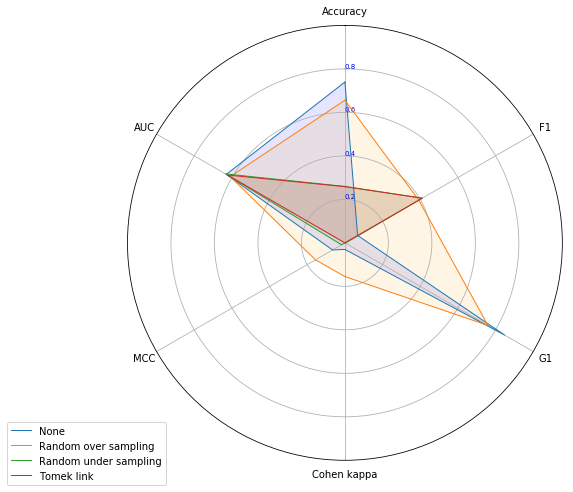

In [266]:
t1.multi_test_split_validation(model=classifier, params=keep2.hyperparameters, iterations=2, sample=['rus','ros','smote','smote+tl','tomek link'], test_size=0.3)

In [242]:
t1.metrics


'No metrics available'

In [245]:
keep2.metrics

,Sampling,Accuracy,Precision,Recall,Specificity,Neg Pred Val,Confusion Sum,F1 score,F2 score,G1 score,Cohen kappa score,Brier score loss,MCC,AUC
0,None,0.74020,0.43210,0.07726,0.96549,0.75484,2.22969,0.13109,0.09244,0.84727,0.05865,0.18122,0.08940,0.63743
1,Random under sampling,0.25420,0.25378,1.00000,0.00075,1.00000,2.25453,0.40483,0.62969,0.00150,0.00038,0.53668,0.01380,0.64664
2,Random over sampling,0.65398,0.35135,0.43046,0.72993,0.79041,2.30215,0.38690,0.41191,0.75897,0.14930,0.24000,0.15079,0.61030
3,SMOTE,0.62486,0.33684,0.49448,0.66917,0.79572,2.29621,0.40072,0.45216,0.72698,0.14175,0.25858,0.14729,0.61649
4,SMOTE + TL,0.65230,0.33065,0.36203,0.75094,0.77597,2.21959,0.34563,0.35529,0.76325,0.10954,0.26496,0.10975,0.58329
5,Tomek link,0.25364,0.25364,1.00000,0.00000,0.00000,0.00000,0.40464,0.62952,0.00000,0.00000,0.44935,0.00000,0.64003
6,SMOTE + ENN,0.25364,0.25364,1.00000,0.00000,0.00000,0.00000,0.40464,0.62952,0.00000,0.00000,0.65572,0.00000,0.64472
